# Pre-processing Idaho Allocation data for WaDEQA upload.
- Purpose:  To pre-process the Idaho data into one master file for simple DataFrame creation and extraction.  Working Idaho data for WaDEQA 2.0 is mostly composed of point of diversion data.
- Notes: working with POD and POU data.  Working with assumption that both POD and POU data share the same water right record information.

In [1]:
#Needed Libararies

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# API retrieval
import requests
import json

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Working Directory
workingDir = "G:/Shared drives/WaDE Data/Idaho/WaterAllocation/RawInputData"
os.chdir(workingDir)

## Import Input Data

In [6]:
# POD Data
FI_POD = "shapefile/Water_Right_PODs/Water_Right_PODs.shp"
dfinPOD = gpd.read_file(FI_POD)

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOD:
    dfinPOD['WaDEUUID'] = "idD" + dfinPOD.index.astype(str)
#     dfinPOD.to_csv('Water_Right_PODs_input.csv', index=False)

dfinPOD = dfinPOD.drop(['geometry'], axis=1) # don't want geometry for POD sites.
print(len(dfinPOD))
dfinPOD.head(5)

260096


,OBJECTID,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,VersionNum,Status,Basis,PriorityDa,Owner,OverallMax,Source,SourceQual,TributaryO,Tributar_1,WaterDistr,DiversionN,DataSource,MetalTagNu,DiversionT,RightID,PointOfDiv,WRReport,WRDocs,WRMap,SpatialDat,TrustOrNon,Uses,OverallM_1,Latitude,Longitude,WaDEUUID
0,1,63-10824,63,10824,None,0,Active,License,1989-06-21,MAURICE MC CLUE,0.19,GROUND WATER,None,None,None,TBD,None,QQ,None,None,22,16,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,482579,None,"IRRIGATION, DOMESTIC",68.1,43.690868,-116.416209,idD0
1,2,67-7744,67,7744,None,0,Active,License,1992-05-27,UNITED STATES OF AMERICA ACTING THROUGH,0.05,SPRING,None,SINKS,None,67,None,QQ,None,None,130,122,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,50203,None,"STOCKWATER, WILDLIFE",1.6,44.254309,-116.490468,idD1
2,3,63-11206,63,11206,None,0,Active,License,1990-02-28,JAMES P MERTZ,0.13,GROUND WATER,None,None,None,NWD,None,QQ,None,None,175,160,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,8421,None,COMMERCIAL,1.3,43.616132,-116.874101,idD2
3,4,36-8313A,36,8313,A,0,Active,License,1986-08-20,SOUTHFIELD LAND & LIVESTOCK LLC,1.20,GROUND WATER,None,None,None,130,None,GPS - Downloaded,A0003417,None,207,185,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,137260,T,IRRIGATION,240.0,42.761730,-114.791493,idD3
4,5,36-8313A,36,8313,A,0,Active,License,1986-08-20,SOUTHFIELD LAND & LIVESTOCK LLC,1.20,GROUND WATER,None,None,None,130,None,GPS - Downloaded,A0003409,None,207,186,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,137261,T,IRRIGATION,240.0,42.760155,-114.791472,idD4


In [7]:
# POU - use shapefile
FI_POU = "shapefile/WaterRightPOUs/WaterRightPOUs.shp"
dfinPOU = gpd.read_file(FI_POU)

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOU:
    dfinPOU['WaDEUUID'] = "idU" + dfinPOU.index.astype(str)
#     dfinPOU.to_csv('WaterRightPOUs_input.csv', index=False)

print(len(dfinPOU))
dfinPOU.head(1)

212735


,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,TotalAcres,AcreLimit,Source,SourceQual,TributaryO,Tributar_1,WaterDistr,LargePOU,RightID,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,cent_Longi,cent_Latit,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,33-10900,33,10900,None,Active,1934-06-28,2001-10-11,UNITED STATES OF AMERICA ACTING THROUGH,STOCKWATER,04,0.0,0.0,LITTLE LOST RIVER,None,SINKS,None,33,0,222600,2,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,None,-113.169815,43.981397,0.55442,0.000934,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940...",idU0


## POD Sites Data

In [8]:
# create output POD dataframe

dfPOD = pd.DataFrame()

# Data Assessment UUID
dfPOD['WaDEUUID'] = dfinPOD['WaDEUUID']

# Water Source
dfPOD['in_WaterSourceName'] = dfinPOD['Source'].str.strip()
dfPOD['in_WaterSourceTypeCV'] = "" # autfo fill in below

# Site
dfPOD['in_CoordinateAccuracy'] = "Unspecified"
dfPOD['in_CoordinateMethodCV'] = dfinPOD['DataSource']
dfPOD['in_County'] = "Unspecified"
dfPOD['in_Latitude'] = dfinPOD['Latitude']
dfPOD['in_Longitude'] = dfinPOD['Longitude']
dfPOD['in_PODorPOUSite'] = "POD"
dfPOD['in_SiteName'] = dfinPOD['DiversionN']
dfPOD['in_SiteNativeID'] = "POD" + dfinPOD['PointOfDiv'].astype(str).str.strip()
dfPOD['in_SiteTypeCV'] = "Unspecified"

# Allocation Fact
dfPOD['in_AllocationNativeID'] = dfinPOD['WaterRight'].astype(str).str.strip()
dfPOD['in_AllocationOwner'] = dfinPOD['Owner']
dfPOD['in_AllocationPriorityDate'] = dfinPOD['PriorityDa']
dfPOD['in_AllocationFlow_CFS'] = dfinPOD['OverallMax']
dfPOD['in_AllocationBasisCV'] = dfinPOD['Basis'].str.strip()
dfPOD['in_AllocationLegalStatusCV'] = dfinPOD['Status'].str.strip()
dfPOD['in_BeneficialUseCategory'] = dfinPOD['Uses'].astype(str).str.strip()
dfPOD['in_IrrigatedAcreage'] = ""
dfPOD['in_WaterAllocationNativeURL'] = dfinPOD['WRReport']

print(len(dfPOD))
dfPOD.head(1)

260096


,WaDEUUID,in_WaterSourceName,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_Latitude,in_Longitude,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationFlow_CFS,in_AllocationBasisCV,in_AllocationLegalStatusCV,in_BeneficialUseCategory,in_IrrigatedAcreage,in_WaterAllocationNativeURL
0,idD0,GROUND WATER,,Unspecified,QQ,Unspecified,43.690868,-116.416209,POD,None,POD16,Unspecified,63-10824,MAURICE MC CLUE,1989-06-21,0.19,License,Active,"IRRIGATION, DOMESTIC",,https://research.idwr.idaho.gov/apps/waterrigh...


In [9]:
dfPOD['in_BeneficialUseCategory'].unique()

array(['IRRIGATION, DOMESTIC', 'STOCKWATER, WILDLIFE', 'COMMERCIAL',
       'IRRIGATION', 'COMMERCIAL, DOMESTIC', 'HEATING', 'DOMESTIC',
       'INDUSTRIAL', 'STOCKWATER STORAGE', 'MUNICIPAL',
       'STOCKWATER, DOMESTIC', 'IRRIGATION, DOMESTIC, FIRE PROTECTION',
       'POWER', 'STOCKWATER, STOCKWATER STORAGE', 'AESTHETIC',
       'FISH PROPAGATION',
       'IRRIGATION, IRRIGATION STORAGE, IRRIGATION FROM STORAGE, STOCKWATER, STOCKWATER STORAGE, WILDLIFE STORAGE, RECREATION STORAGE, DIVERSION TO STORAGE',
       'POWER, POWER STORAGE, POWER FROM STORAGE',
       'IRRIGATION, STOCKWATER, COMMERCIAL, DOMESTIC, FIRE PROTECTION',
       'DOMESTIC, FIRE PROTECTION', 'RECREATION', 'STOCKWATER',
       'IRRIGATION, STOCKWATER',
       'STOCKWATER, STOCKWATER STORAGE, WILDLIFE STORAGE',
       'WILDLIFE STORAGE, DIVERSION TO STORAGE',
       'DOMESTIC, AESTHETIC STORAGE, DIVERSION TO STORAGE',
       'STOCKWATER, COMMERCIAL', 'None',
       'IRRIGATION, IRRIGATION STORAGE, IRRIGATION FROM ST

## POU Site Data

In [12]:
# create output POD dataframe

dfPOU = pd.DataFrame()

# Data Assessment UUID
dfPOU['WaDEUUID'] = dfinPOU['WaDEUUID']

# Water Source
dfPOU['in_WaterSourceName'] = dfinPOU['Source'].str.strip()
dfPOD['in_WaterSourceTypeCV'] = "" # autfo fill in below

# Site
dfPOU['in_CoordinateAccuracy'] = "Unspecified"
dfPOU['in_CoordinateMethodCV'] = "Centroid"
dfPOU['in_County'] = "Unspecified"
dfPOU['in_Latitude'] = dfinPOU['cent_Latit']
dfPOU['in_Longitude'] = dfinPOU['cent_Longi']
dfPOU['in_PODorPOUSite'] = "POU"
dfPOU['in_SiteName'] = "Unspecified"
dfPOU['in_SiteTypeCV'] = "Unspecified"
dfPOU['in_SiteNativeID'] = "POU" + dfinPOU['PlaceOfUse'].astype(str).str.strip()

# Allocation Fact
dfPOU['in_AllocationNativeID'] = dfinPOU['WaterRight']
dfPOU['in_AllocationOwner'] = dfinPOU['Owner']
dfPOU['in_AllocationPriorityDate'] = dfinPOU['PriorityDa']
dfPOU['in_AllocationFlow_CFS'] = ""
dfPOU['in_AllocationBasisCV'] = ""
dfPOU['in_AllocationLegalStatusCV'] = dfinPOU['Status'].str.title()
dfPOU['in_BeneficialUseCategory'] = dfinPOU['WaterUse'].str.strip()
dfPOU['in_IrrigatedAcreage'] = dfinPOU['AcreLimit']
dfPOU['in_WaterAllocationNativeURL'] = dfinPOU['WRReport']

print(len(dfPOU))
dfPOU.head(1)

212735


,WaDEUUID,in_WaterSourceName,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_Latitude,in_Longitude,in_PODorPOUSite,in_SiteName,in_SiteTypeCV,in_SiteNativeID,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationFlow_CFS,in_AllocationBasisCV,in_AllocationLegalStatusCV,in_BeneficialUseCategory,in_IrrigatedAcreage,in_WaterAllocationNativeURL
0,idU0,LITTLE LOST RIVER,Unspecified,Centroid,Unspecified,43.981397,-113.169815,POU,Unspecified,Unspecified,POU2,33-10900,UNITED STATES OF AMERICA ACTING THROUGH,1934-06-28,,,Active,STOCKWATER,0.0,https://research.idwr.idaho.gov/apps/waterrigh...


## Concatenate and Clean Data

In [13]:
# Concatenate dataframes
frames = [dfPOD, dfPOU]
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True)
print(len(outdf))

472831


In [16]:
# remove special characters AllocationOwner

import re

def cleanOwnerDataFunc(Val):
    Val = str(Val).strip()
    Val = re.sub("[$@&.;,'/\)(-]", "", Val).strip()
    return Val

outdf['in_AllocationOwner'] = outdf.apply(lambda row: cleanOwnerDataFunc(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['MAURICE MC CLUE', 'UNITED STATES OF AMERICA ACTING THROUGH',
       'JAMES P MERTZ', ..., 'BILL THOMAS', 'DAVID L GASTMAN',
       'TROY GLASGOW'], dtype=object)

In [47]:
# WaterSourceType
# searach water source name for keywords

WaterSourceTypeDict = {
"canal" :  "Surface Water",
"channel" : "Surface Water",
"creek" : "Surface Water",
"ditch" : "Surface Water",
"drain" : "Surface Water",
"drains" : "Surface Water",
"draw" : "Surface Water",
"dry" : "Surface Water",
"fork" : "Surface Water",
"gluch" : "Surface Water",
"gulch": "Surface Water",
"ground water" : "Groundwater",
"hole" : "Surface Water",
"holes" : "Surface Water",
"hollow"  : "Surface Water",
"lake" :  "Surface Water",
"lakes" :  "Surface Water",
"pond" :  "Surface Water",
"reservoir" : "Surface Water",
"river" : "Surface Water",
"runoff" : "Surface Water",
"seep" : "Surface Water",
"slough" : "Surface Water",
"spring" :  "Surface Water",
"springs" :  "Surface Water",
"spr" :  "Surface Water",
"stream" : "Surface Water",
"streams" : "Surface Water",
"sub" : "Groundwater",
"surface" : "Surface Water",
"swamp" : "Surface Water",
"swamps" : "Surface Water",
"wash" : "Surface Water",
"waste" : "Reuse",
"wastewater" : "Reuse"}

def assignWaterSourceType(val):
    if val == '' or pd.isnull(val):
        outList = 'Unspecified'
    elif val == "GROUND WATER":
        outList = "Groundwater"
    else:
        val = val.lower().strip()
        for i in WaterSourceTypeDict.keys():
            if i in val:
                outList = WaterSourceTypeDict[i]
                break
            else:
                outList = 'Unspecified'
    return outList

outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: assignWaterSourceType(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array(['Groundwater', 'Surface Water', 'Reuse', 'Unspecified'],
      dtype=object)

In [48]:
# Update datatype of Priority Date to fit WaDE 2.0 structure

def formatDateString(inString1):
    inString = str(inString1).strip()
    try:
        if inString == "" or pd.isnull(inString):
            valndf = ""
        else:
            valD = pd.to_datetime(inString)
            valnDd = valD.date()
            valndf = valnDd.strftime('%m/%d/%Y')
    except:
        valndf = ""
    return valndf

outdf['in_AllocationPriorityDate'] = outdf.apply(lambda row: formatDateString(row['in_AllocationPriorityDate']), axis=1)
outdf['in_AllocationPriorityDate'].unique()

array(['06/21/1989', '05/27/1992', '02/28/1990', ..., '05/13/2019',
       '07/11/2019', '05/18/2021'], dtype=object)

In [50]:
# Creating WaDE Custom water source native ID for easy water source identification
# ----------------------------------------------------------------------------------------------------

# Create temp WaterSourceNativeID dataframe of unique water source.
def assignWaterSourceNativeID(colrowValue):
    string1 = str(colrowValue)
    outstring = "WaDEID_WS" + string1
    return outstring

dfWaterSourceNativeID = pd.DataFrame()
dfWaterSourceNativeID['in_WaterSourceName'] = outdf['in_WaterSourceName']
dfWaterSourceNativeID['in_WaterSourceTypeCV'] = outdf['in_WaterSourceTypeCV']
dfWaterSourceNativeID = dfWaterSourceNativeID.drop_duplicates()

dftemp = pd.DataFrame(index=dfWaterSourceNativeID.index)
dftemp["Count"] = range(1, len(dftemp.index) + 1)
dfWaterSourceNativeID['in_WaterSourceNativeID'] = dftemp.apply(lambda row: assignWaterSourceNativeID(row['Count']), axis=1)

# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom water source native ID
def retrieveWaterSourceNativeID(A, B):
    if (A == '' and B == '') or (pd.isnull(A) and pd.isnull(B)):
        outList = ''
    else:
        ml = dfWaterSourceNativeID.loc[(dfWaterSourceNativeID['in_WaterSourceName'] == A) & 
                                       (dfWaterSourceNativeID['in_WaterSourceTypeCV'] == B), 'in_WaterSourceNativeID']
        if not (ml.empty):  # check if the series is empty
            outList = ml.iloc[0]
        else:
            outList = ''
    return outList

outdf['in_WaterSourceNativeID'] = outdf.apply(lambda row: retrieveWaterSourceNativeID( row['in_WaterSourceName'], row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceNativeID'].unique()

array(['WaDEID_WS1', 'WaDEID_WS2', 'WaDEID_WS3', ..., 'WaDEID_WS6781',
       'WaDEID_WS6782', 'WaDEID_WS6783'], dtype=object)

In [51]:
# in_Latitude & in_Longitude
outdf['in_Latitude'] = pd.to_numeric(outdf['in_Latitude'], errors='coerce').fillna(0)
outdf['in_Longitude'] = pd.to_numeric(outdf['in_Longitude'], errors='coerce').fillna(0)
outdf.head(1)

,WaDEUUID,in_WaterSourceName,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_Latitude,in_Longitude,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationFlow_CFS,in_AllocationBasisCV,in_AllocationLegalStatusCV,in_BeneficialUseCategory,in_IrrigatedAcreage,in_WaterAllocationNativeURL,in_WaterSourceNativeID
0,idD0,GROUND WATER,Groundwater,Unspecified,QQ,Unspecified,43.690868,-116.416209,POD,None,POD16,Unspecified,63-10824,MAURICE MC CLUE,06/21/1989,0.19,License,Active,"IRRIGATION, DOMESTIC",,https://research.idwr.idaho.gov/apps/waterrigh...,WaDEID_WS1


## Shapefile Data
- For attaching gemetry to csv inputs.

In [52]:
# Shapefile input
dfPoUshapetemp = gpd.read_file('shapefile/WaterRightPOUs/WaterRightPOUs.shp')
print(len(dfPoUshapetemp))
dfPoUshapetemp.head(1)

212735


,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,TotalAcres,AcreLimit,Source,SourceQual,TributaryO,Tributar_1,WaterDistr,LargePOU,RightID,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,cent_Longi,cent_Latit,Shape_Leng,Shape_Area,geometry
0,33-10900,33,10900,None,Active,1934-06-28,2001-10-11,UNITED STATES OF AMERICA ACTING THROUGH,STOCKWATER,04,0.0,0.0,LITTLE LOST RIVER,None,SINKS,None,33,0,222600,2,https://research.idwr.idaho.gov/apps/waterrigh...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,None,-113.169815,43.981397,0.55442,0.000934,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940..."


<AxesSubplot:>

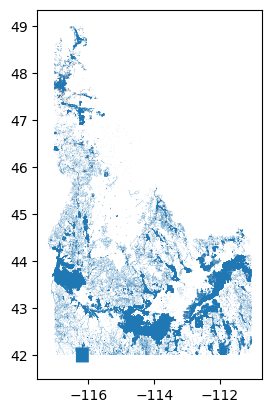

In [53]:
dfPoUshapetemp.plot()

In [54]:
columnsList = ['in_SiteNativeID', 'geometry']
dfPoUshape = pd.DataFrame(columns=columnsList)
dfPoUshape['in_SiteNativeID'] = "POU" + dfPoUshapetemp['PlaceOfUse'].astype(str).str.strip()
dfPoUshape['geometry'] = dfPoUshapetemp['geometry']
dfPoUshape = dfPoUshape.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
dfPoUshape.head(3)

,in_SiteNativeID,geometry
0,POU2,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940..."
1,POU7,"POLYGON ((-116.91055 43.52022, -116.91051 43.5..."
2,POU9,"POLYGON ((-116.17500 43.58271, -116.17537 43.5..."


## Review and Export

In [55]:
outdf.dtypes

WaDEUUID                        object
in_WaterSourceName              object
in_WaterSourceTypeCV            object
in_CoordinateAccuracy           object
in_CoordinateMethodCV           object
in_County                       object
in_Latitude                    float64
in_Longitude                   float64
in_PODorPOUSite                 object
in_SiteName                     object
in_SiteNativeID                 object
in_SiteTypeCV                   object
in_AllocationNativeID           object
in_AllocationOwner              object
in_AllocationPriorityDate       object
in_AllocationFlow_CFS           object
in_AllocationBasisCV            object
in_AllocationLegalStatusCV      object
in_BeneficialUseCategory        object
in_IrrigatedAcreage             object
in_WaterAllocationNativeURL     object
in_WaterSourceNativeID          object
dtype: object

In [56]:
#Exporting to Finished File
outdf.to_csv('P_IdahoMain.csv', index=False)  # The output
dfPoUshape.to_csv('P_idGeometry.csv', index=False) # The output geometry.

In [ ]:
# # plot check sites.csv file
# fileInput = "G:/Shared drives/WaDE Data/Idaho/WaterAllocation/ProcessedInputData/sites.csv"
# df = pd.read_csv(fileInput)

# import geoplot as gplt
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
# gplt.pointplot(gdf)

In [ ]:
# # plot check sites.csv file
# fileInput = "G:/Shared drives/WaDE Data/Idaho/WaterAllocation/ProcessedInputData/sites.csv"
# df = pd.read_csv(fileInput)
# df = df[df['PODorPOUSite'] =='POU']

# gs = gpd.GeoSeries.from_wkt(df['Geometry'])
# gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
# gdf.plot()

In [60]:
# outtemp = pd.DataFrame()
# outtemp['in_BeneficialUseCategory'] = outdf['in_BeneficialUseCategory'].unique()
# outtemp = outtemp.assign(in_BeneficialUseCategory=outtemp['in_BeneficialUseCategory'].str.split(',')).explode('in_BeneficialUseCategory').reset_index(drop=True)
# for x in outtemp['in_BeneficialUseCategory'].sort_values().unique():
#     print(f'"' + x + '",')
# outtemp.to_csv('outtemp.csv', index=False)  # The output

" ADMINISTRATIVE",
" AESTHETIC",
" AESTHETIC FROM STORAGE",
" AESTHETIC STORAGE",
" COMMERCIAL",
" COMMERCIAL FROM STORAGE",
" COMMERCIAL STORAGE",
" COOLING",
" COOLING FROM STORAGE",
" COOLING STORAGE",
" DIVERSION TO STORAGE",
" DOMESTIC",
" DOMESTIC FROM STORAGE",
" DOMESTIC STORAGE",
" FIRE PROTECTION",
" FIRE PROTECTION FROM STORAGE",
" FIRE PROTECTION STORAGE",
" FISH HABITAT",
" FISH HABITAT STORAGE",
" FISH PROPAGATION",
" FISH PROPAGATION FROM STORAGE",
" FISH PROPAGATION STORAGE",
" FLOOD CONTROL STORAGE",
" GROUND WATER RECHARGE",
" GROUND WATER RECHARGE FROM STORAGE",
" GROUND WATER RECHARGE STORAGE",
" HEATING",
" INDUSTRIAL",
" INDUSTRIAL FROM STORAGE",
" INDUSTRIAL STORAGE",
" IRRIGATION FROM STORAGE",
" IRRIGATION STORAGE",
" MINING",
" MINING FROM STORAGE",
" MINING STORAGE",
" MITIGATION",
" MITIGATION BY NON-USE",
" MUNICIPAL",
" MUNICIPAL FROM STORAGE",
" MUNICIPAL STORAGE",
" POWER",
" POWER FROM STORAGE",
" POWER STORAGE",
" RECREATION",
" RECREATION FROM STORAGE

In [69]:
outtemp = outdf[['in_AllocationNativeID', 'in_PODorPOUSite']].copy()
outtemp['in_AllocationNativeID'] = "IDwr" + outtemp['in_AllocationNativeID'].astype(str)
outtemp = outtemp.drop_duplicates().reset_index(drop=True)
outtemp.to_csv('outtemp.csv', index=False)  # The output